In [24]:
%matplotlib inline
# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
#eb notes == the two dots helps you to nmove backward to different directory
city_data_to_load = "../data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
# EB NOTES =create the string of data
city_data = os.path.join("data", "city_data.csv")
ride_data = os.path.join("data", "ride_data.csv")
print(city_data)
# Combine the data into a single dataset
    #import file using panda
# EB notes = Read the file created
city_data_df = pd.read_csv(city_data)
#Preview city_data
#city_data_df.head()

data\city_data.csv


In [18]:
#Preview ride_data
ride_data_df = pd.read_csv(ride_data)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [20]:
#duplicate  city so drop dups
city_data_df = city_data_df.drop_duplicates('city')
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [29]:
    #Merge both files
combined_data_df = pd.merge(ride_data_df, city_data_df, on='city')

# Display the data table for preview
#combined_data_df.groupby('city').mean()['fare']
combined_data_df.groupby('city')
# EB notes: groupby memory location
# EB notes:parantheses are for function or method to call them or execute them
#EB notes:use square bracket to index into an object

In [30]:
    #Merge both files
combined_data_df = pd.merge(ride_data_df, city_data_df, how='inner', on='city')


#EB notes: outer means grabs all the rows regardless of the match. left is all the rows that match on the left side. Check out SQL JOIN
# Display the data table for preview
-combined_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

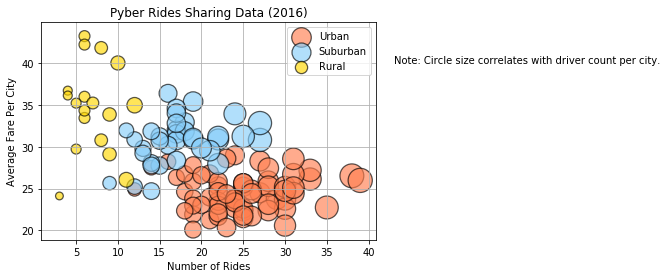

In [91]:
# Obtain the x and y coordinates for each of the three city types
city_grouped = combined_data_df.groupby('city').agg({'fare': 'mean','ride_id': 'count', 'driver_count':'first', 'type':'first'})

# Build the scatter plots for each city types
#plt.scatter(city_grouped['ride_id'],city_grouped['fare'], s = city_grouped['driver_count']*5, alpha = .55)
# Incorporate the other graph properties
#Urban
urban = city_grouped.loc[city_grouped["type"]== "Urban"]

#suburban
suburban = city_grouped.loc[city_grouped["type"]== "Suburban"]

#rural
rural = city_grouped.loc[city_grouped["type"]== "Rural"]


#Urban
plt.scatter(urban["ride_id"], urban["fare"], color = "coral", edgecolors="black", s = urban["ride_id"]*15, label = "Urban", alpha = 0.65, linewidth = 1.25)

#Suburban
plt.scatter(suburban["ride_id"], suburban["fare"], color = "lightskyblue", edgecolors ="black", s = suburban["ride_id"]*20, label = "Suburban", alpha = 0.65, linewidth = 1.25)

#Rural
plt.scatter(rural["ride_id"], rural["fare"], color = "gold", edgecolors = "black", s = rural["ride_id"]*20, label = "Rural", alpha = 0.65, linewidth = 1.25)


#eb added --Add title, x axis label and y axis label.
plt.title("Pyber Rides Sharing Data (2016)")
plt.xlabel("Number of Rides")
plt.ylabel("Average Fare Per City")
plt.text(43, 40,"Note: Circle size correlates with driver count per city.")
# Create a legend
plt.legend(loc= "upper right")
# Incorporate a text label regarding circle size
#Y, X = np.mgrid[-3:3:100j, -3:3:100j]
#plt.tight_layout()
plt.grid(True)
# Save Figure


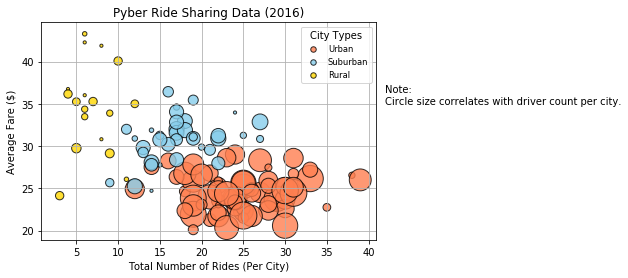

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

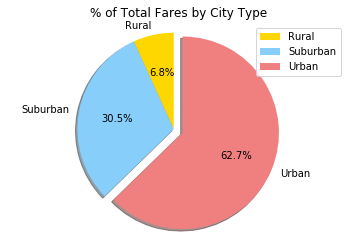

In [122]:
# Calculate Type Percents
city_fare_pie = combined_data_df.groupby(["type"])["fare"].sum()
city_fare_pie
# Build Pie Chart
colors = ["gold","lightskyblue","lightcoral"]
labels = ["Urban", "Rural","Suburban"]
explode = [0, 0, 0.1]

plt.title("% of Total Fares by City Type")
plt.pie(city_fare_pie, explode=explode, labels=city_fare_pie.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis('equal')
#Add the legend.
plt.legend(loc = "upper right")
#plt.tight_layout()

#plt.axis("type")

#plt.savefig("Images/% of Total Fares By City Types.png")
plt.show()






# Save Figure


In [113]:
# Show Figure
plt.show()

## Total Rides by City Type

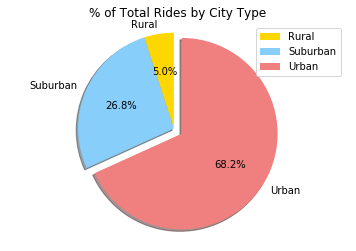

In [123]:
# Calculate Type Percents
city_rides_pie = combined_data_df.groupby(["type"])["ride_id"].sum()
city_rides_pie
# Build Pie Chart
colors = ["gold","lightskyblue","lightcoral"]
labels = ["Urban", "Rural","Suburban"]
explode = [0, 0, 0.1]

plt.title("% of Total Rides by City Type")
plt.pie(city_fare_pie, explode=explode, labels=city_fare_pie.index, colors=colors,
        autopct="%1.5f%%", shadow=True, startangle=100)
plt.axis('equal')
#Add the legend.
plt.legend(loc = "upper right")
#plt.tight_layout()

#plt.axis("type")

#plt.savefig("Images/% of Total Fares By City Types.png")
plt.show()






# Save Figure


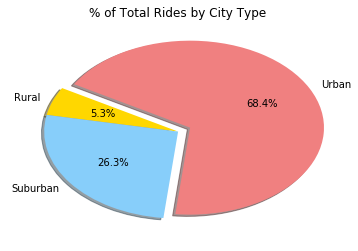

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

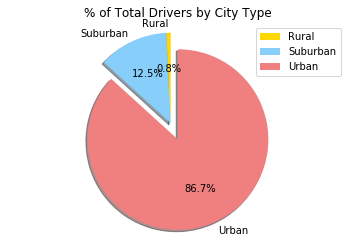

In [132]:
# Calculate Driver Percents

# Calculate Type Percents
city_driver_pie = combined_data_df.groupby(["type"])["driver_count"].sum()
city_driver_pie
# Build Pie Chart
colors = ["gold","lightskyblue","lightcoral"]
labels = ["Urban", "Rural","Suburban"]
explode = [0,0,0.2]

plt.title("% of Total Drivers by City Type")
plt.pie(city_fare_pie, explode=explode, labels=city_fare_pie.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis('equal')
#Add the legend.
plt.legend(loc = "upper right")
#plt.tight_layout()

#plt.axis("type")

#plt.savefig("Images/% of Total Fares By City Types.png")
plt.show()






# Save Figure



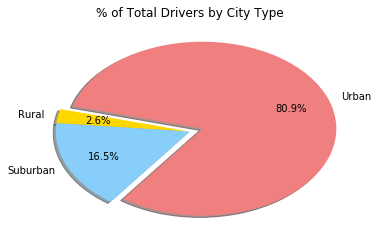

In [6]:
# Show Figure
plt.show()